# Задание 1

In [21]:
import numpy as np

In [22]:
def get_random_with_cov(sigma):
    A = np.linalg.cholesky(sigma)
    z = np.random.normal(size=(np.shape(A)[1], 1))
    m = np.zeros(shape=(np.shape(A)[1], 1))
    
    return m + A @ z

In [23]:
M = np.random.random(size=(3, 3))
S = M @ M.T
print(get_random_with_cov(S))

[[-0.13529052]
 [-1.15363307]
 [-0.41566308]]


# Задание 2

In [24]:
import matplotlib.pyplot as plt
import os
import xlrd3
import scipy

In [25]:
def mnq(x, y, xlabel, ylabel, label='', k=0, b=0):
    """
    Строит прямую по методу наименьших квадратов.
    :param x: экспериментальные данные по х
    :param y: экспериментальные данные по у
    :param xlabel: подпись оси х
    :param ylabel: подпись оси y
    :param k: теор прямая
    :param b: теор прямая

    """
    polynom, _ = np.polyfit(x, y, deg=1, cov=True)
    polynom_function = np.poly1d(polynom)
    plt.figure(figsize=(16, 9))
    plt.scatter(x, y)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, polynom_function(x), label=label + str(polynom_function))

    if k != 0 or b != 0:
        plt.plot(x, k * x + b)

    plt.grid()
    plt.legend(loc='best', fontsize=12)

    
    plt.show()

In [26]:
def TableV(path, Nrows, Ncolums):
    """
    Считывает данные из вертикальной excel таблицы. Первая строка не считывается, считается что там подпись
    Каждый столбец записывается в отдельный список
    :param path: путь до таблицы
    :param: Nrows: количество строк в считываемой таблице
    :param: Ncolums: количество стобцов в считываемой таблице
    :return: Список состоящий из Ncolumn списков, в каждый из которых записан отдельный столбец
    
    """
    workbook = xlrd3.open_workbook(path)

    worksheet = workbook.sheet_by_index(0)
    # Iterate the rows and columns
    data = []
    for i in range(Ncolums):
        data.append([])
    for i in range(Ncolums):
        for j in range(1, Nrows):
            # Print the cell values with tab space
            data[i].append(worksheet.cell_value(j, i))
    return data

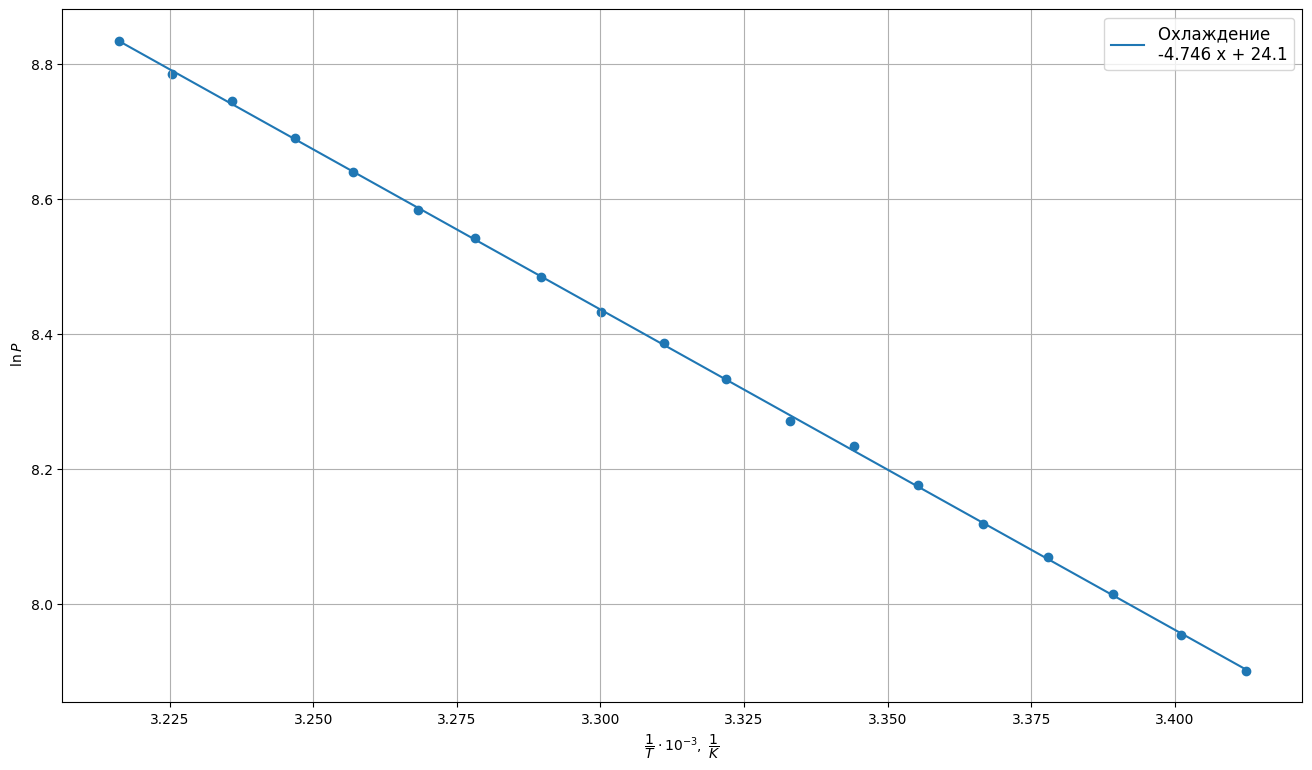

In [27]:
data = TableV(os.getcwd() + '/data.xlsx', 37, 6)

tc = data[4][17:]
lnPc = data[5][17:]


mnq(tc, lnPc, '$ \\dfrac{1}{T} \\cdot 10^{-3}, \\ \\dfrac{1}{K} $', ' $\\ln P$ ', 'Охлаждение')

In [28]:
x = np.linspace(1, 100, 50)
y = x * 34.5 - np.sqrt(2)*1000

y += np.random.random(50)*200

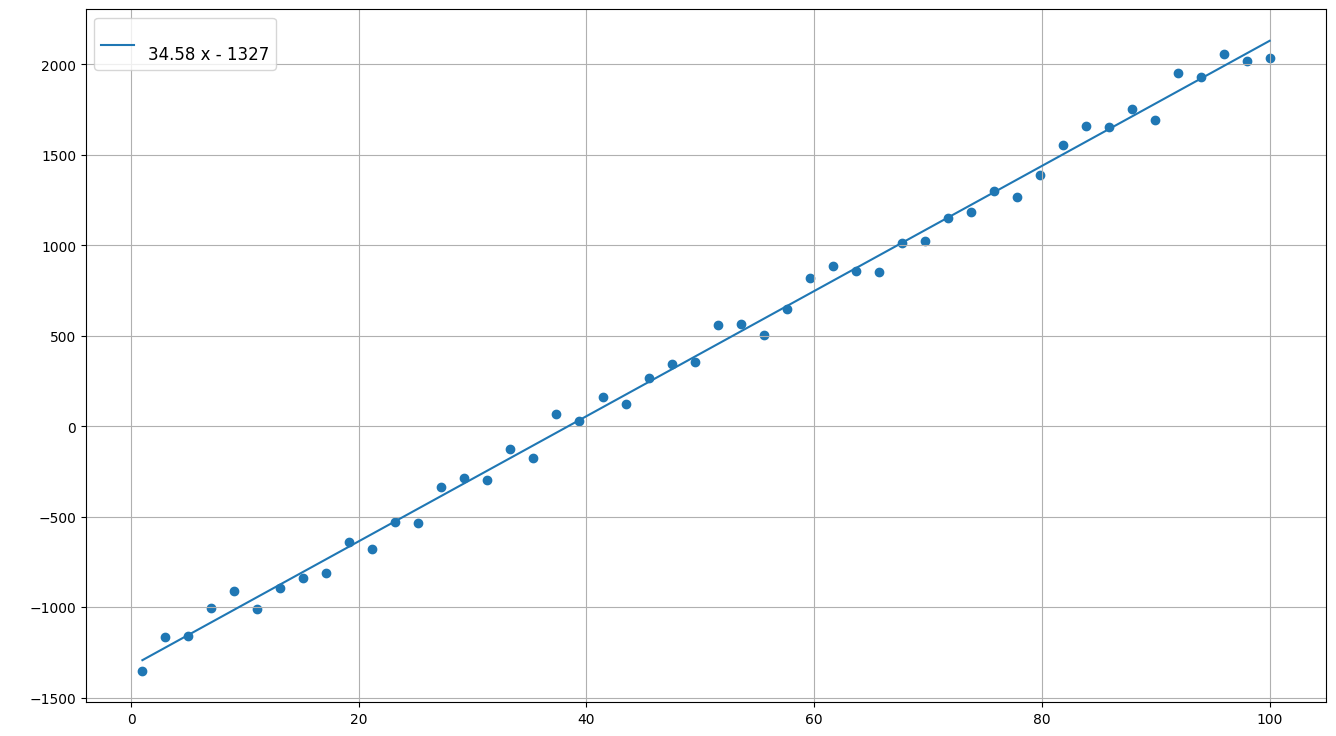

In [29]:
mnq(x, y, '', '  ', '')